# Aplicando Python para análisis de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="200px" height="150px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

# 1. Descarga, manejo y análisis de datos
Para esto utilizaremos el paquete *yfinance*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *yfinance*. Por lo que será necesario instalarlo aparte:

- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: `conda install yfinance`;

otra forma, desde el notebook
- `!pip install yfinance -y`

- una vez finalice la instalación correr el comando: `conda list`, y buscar que sí se haya instalado yfinance


In [1]:
!pip install yfinance

In [2]:
# Buscamos la cosa
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [3]:
import yfinance as yf

Primero importaremos datos desde un archivo con extensión `.csv`

In [4]:
import pandas as pd

In [5]:
# En Jupyter:
# El archivo META.csv debe estar en la misma carpeta que este archivo
#datos=pd.read_csv('META.csv')

In [6]:
# Esto se ejecuta solo una vez (por equipo)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# En Google Colab:
# El archivo debe estar en el drive
direccion='/content/drive/MyDrive/Colab Notebooks/ITESO/SimMat/SimMat_O2023/Montecarlo/' # Especificamos la dirección
datos=pd.read_csv(direccion+'META.csv')

In [8]:

# Muestra las primeras cinco líneas
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
1,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2,2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
3,2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
4,2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700


In [9]:
# Mostramos las últimas cinco filas
datos.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1266,2022-06-10,183.039993,183.100006,175.020004,175.570007,175.570007,27450800
1267,2022-06-13,170.589996,172.580002,164.029999,164.259995,164.259995,31749300
1268,2022-06-14,166.029999,166.750000,161.360001,163.729996,163.729996,27244300
1269,2022-06-15,167.199997,172.160004,163.979996,169.350006,169.350006,30008300
1270,2022-06-16,163.720001,165.080002,159.610001,160.869995,160.869995,26944100


In [10]:
datos.shape

(1271, 7)

In [11]:
import matplotlib.pyplot as plt

<Axes: >

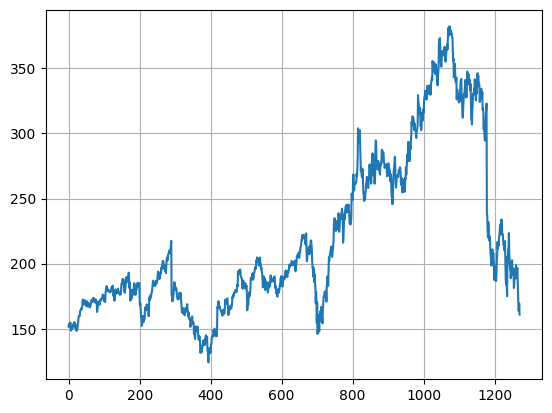

In [12]:
# Obteniendo los datos de una columna y lo graficamos
datos['Adj Close'].plot(grid=True)
#plt.grid()

In [13]:
# Obteniendo datos estadísticos
df_AdjClose=datos['Adj Close']

df_AdjClose.mean() # Promedio

220.36667979150275

In [14]:
df_AdjClose.std() # Desviacióm estamdar

63.43839364826712

In [15]:
df_AdjClose.describe() # Y todo lo de más

count    1271.000000
mean      220.366680
std        63.438394
min       124.059998
25%       174.090004
50%       194.110001
75%       266.619995
max       382.179993
Name: Adj Close, dtype: float64

<Axes: >

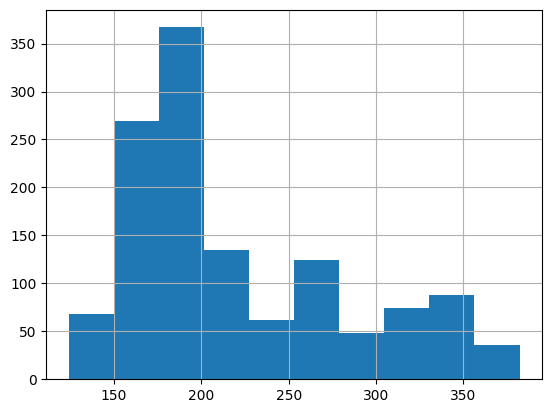

In [16]:
# Histográma
df_AdjClose.hist()

Ahora lo haremos desde Yahoo Finance

In [17]:
datos_yf=yf.download('META','2017-06-01','2023-10-18')
datos_yf.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700


In [18]:
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
1,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2,2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
3,2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
4,2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700


In [19]:
datos_yf.tail() # Fechas actualizadas ;)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-11,323.010010,328.839996,322.950012,327.820007,327.820007,22036300
2023-10-12,328.000000,330.540009,322.690002,324.160004,324.160004,20530500
2023-10-13,323.529999,325.049988,312.369995,314.690002,314.690002,21341000
2023-10-16,318.640015,321.820007,315.519989,321.149994,321.149994,16536100
2023-10-17,318.179993,324.399994,317.299988,324.000000,324.000000,16387800


¿Cómo lucen estos datos?

<Axes: xlabel='Date'>

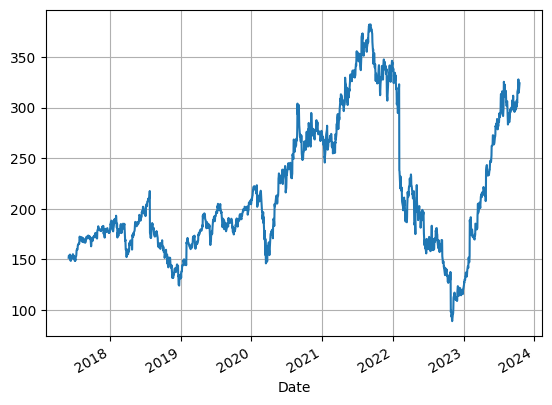

In [20]:
datos_yf['Adj Close'].plot(grid=True) # Acá tenemos las fechas en el eje horizontal

In [21]:
# Importamos Nvidia, Tesla y Meta
tickers=['NVDA', 'TSLA', 'META']
f_inicial='2017-10-01'
f_final='2023-10-01'

datos=yf.download(tickers,f_inicial,f_final)['Adj Close']
datos.head()

[*********************100%%**********************]  3 of 3 completed


,META,NVDA,TSLA
Date,,,
2017-10-02,169.470001,44.252010,22.768667
2017-10-03,169.960007,44.343479,23.209333
2017-10-04,168.419998,44.714298,23.667334
2017-10-05,171.240005,44.689575,23.688667
2017-10-06,172.229996,44.820602,23.792000


In [22]:
datos.tail()

,META,NVDA,TSLA
Date,,,
2023-09-25,300.829987,422.220001,246.990005
2023-09-26,298.959991,419.109985,244.119995
2023-09-27,297.739990,424.679993,240.500000
2023-09-28,303.959991,430.890015,246.380005
2023-09-29,300.209991,434.989990,250.220001


<Axes: xlabel='Date'>

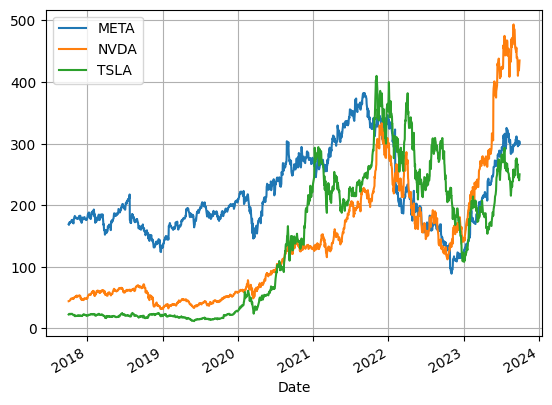

In [23]:
datos.plot(grid=True)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

## 1.2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [24]:
datos.shift().head(2) # Desfasa los precios una fila

,META,NVDA,TSLA
Date,,,
2017-10-02,NaN,NaN,NaN
2017-10-03,169.470001,44.25201,22.768667


In [25]:
datos.head(2)

,META,NVDA,TSLA
Date,,,
2017-10-02,169.470001,44.252010,22.768667
2017-10-03,169.960007,44.343479,23.209333


In [26]:
# Rendimientos
R=(datos-datos.shift())/datos.shift()
R.dropna(inplace=True) # Eliminamos las filas con NaN y sobreescribimos la variable
R.head()

,META,NVDA,TSLA
Date,,,
2017-10-03,0.002891,0.002067,0.019354
2017-10-04,-0.009061,0.008362,0.019733
2017-10-05,0.016744,-0.000553,0.000901
2017-10-06,0.005781,0.002932,0.004362
2017-10-09,0.001568,0.022559,-0.039061


y la gráfica de los rendimientos se puede obtener como...

<Axes: xlabel='Date'>

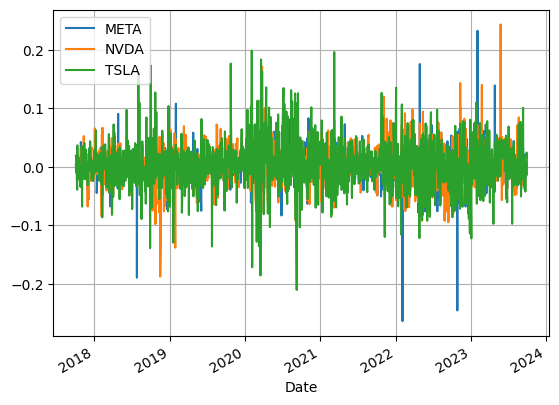

In [27]:
R.plot(grid=True)

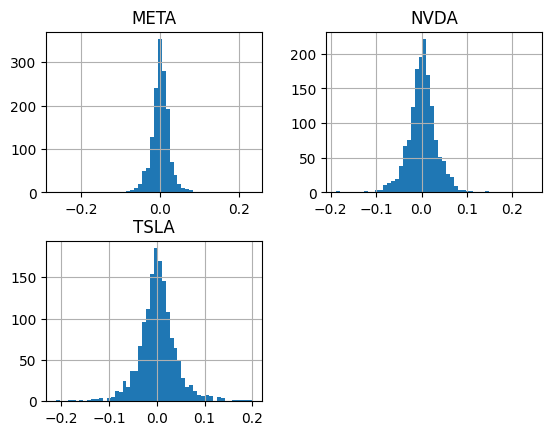

In [28]:
h=R.hist(bins=50)

**Nuesto modelo:**

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [29]:
R=datos.pct_change().dropna() # pct_change -> (datos-datos.shift())/datos.shift()
R.head()

,META,NVDA,TSLA
Date,,,
2017-10-03,0.002891,0.002067,0.019354
2017-10-04,-0.009061,0.008362,0.019733
2017-10-05,0.016744,-0.000553,0.000901
2017-10-06,0.005781,0.002932,0.004362
2017-10-09,0.001568,0.022559,-0.039061


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

___
# 2. Simulación de escenarios futuros de precios

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [30]:
# Una vez que tenemos los rendimientos (R), calculamos la media y std de ellos
m=R.mean()
s=R.std()
m,s

(META    0.000746
 NVDA    0.002038
 TSLA    0.002388
 dtype: float64,
 META    0.026827
 NVDA    0.032306
 TSLA    0.039986
 dtype: float64)

In [31]:
import numpy as np

In [32]:
# Primera marca simulaa: META 30 días con 10000 escenarios
R_META=np.random.normal(m['META'],s['META'],(30,10000))
R_META

array([[-0.03785265,  0.01626981, -0.03546554, ...,  0.03388756,
        -0.01398405,  0.02879195],
       [ 0.00274285, -0.01071291,  0.03192778, ...,  0.0058193 ,
        -0.01722557, -0.0018365 ],
       [ 0.02411716, -0.04055977, -0.00549515, ..., -0.01667579,
        -0.01922736,  0.0523885 ],
       ...,
       [-0.01063894,  0.00133156, -0.0157456 , ...,  0.00370193,
        -0.00186142, -0.07265785],
       [ 0.00429413, -0.0099747 , -0.01246725, ..., -0.02356844,
         0.02528513,  0.04954133],
       [ 0.02014269,  0.00415058, -0.02024135, ...,  0.02251354,
        -0.00433405, -0.01414529]])

In [33]:
fechas=pd.date_range('2023-10-02',periods=30)
df_META=pd.DataFrame(R_META,index=fechas)
df_META

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-10-02,-0.037853,0.016270,-0.035466,-0.010896,0.006080,-0.020173,-0.065985,0.055534,-0.040740,0.010604,...,0.010624,0.008240,-0.022081,0.039172,0.046476,0.030733,-0.016248,0.033888,-0.013984,0.028792
2023-10-03,0.002743,-0.010713,0.031928,-0.012577,0.032775,0.057899,0.039053,-0.070299,0.044481,-0.004334,...,-0.015857,0.002474,-0.024101,0.002246,0.005113,-0.030299,0.023697,0.005819,-0.017226,-0.001836
2023-10-04,0.024117,-0.040560,-0.005495,0.023649,-0.015368,0.014446,-0.027397,0.013805,-0.002606,-0.010913,...,-0.011723,-0.061511,0.013460,-0.007266,-0.020931,-0.004099,0.013780,-0.016676,-0.019227,0.052388
2023-10-05,-0.010696,-0.026615,0.039600,0.061887,0.034975,-0.010337,-0.001673,0.011951,0.020158,0.018758,...,0.002229,0.002982,0.025301,-0.024775,-0.069452,-0.021881,0.016868,0.003180,-0.025779,0.027083
2023-10-06,0.001653,0.026026,-0.019413,-0.015842,0.006711,0.033238,0.042209,-0.022180,0.056299,0.018176,...,0.012411,0.016577,0.003390,0.017454,-0.003808,0.002425,0.011553,-0.024614,0.012969,0.009349
2023-10-07,-0.026309,0.029846,-0.030264,-0.012473,-0.013704,0.005510,-0.025163,0.007854,-0.000034,0.021729,...,-0.018717,0.018576,0.050220,-0.063878,-0.062849,0.030571,-0.013783,-0.025398,-0.013452,0.010952
2023-10-08,-0.001890,-0.020686,-0.022351,-0.028296,0.009059,-0.007654,-0.056642,0.011126,-0.006133,0.007980,...,-0.013839,-0.004239,0.008129,-0.007379,0.001657,0.028828,-0.004828,-0.026796,-0.038889,-0.025825
2023-10-09,0.007841,0.020975,0.012762,-0.009132,0.013656,0.016175,-0.029864,0.012785,0.035408,-0.044500,...,0.003562,0.041061,-0.040705,0.037696,-0.011690,-0.040358,0.023835,-0.053455,0.027126,0.023509
2023-10-10,-0.020176,0.001031,0.063376,-0.037108,-0.010001,-0.020135,-0.001298,0.059170,0.026545,0.034612,...,-0.010608,-0.022628,-0.001213,-0.034870,0.006297,-0.001077,-0.043037,0.014992,0.028918,-0.034373
2023-10-11,-0.006570,-0.023819,0.005243,-0.026938,-0.042198,0.019302,0.017491,-0.015360,-0.017124,0.001459,...,0.014539,-0.014828,0.032831,0.001384,-0.021619,0.013916,0.017691,0.023555,0.039630,0.012531


Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2018, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2019 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

In [34]:
# Función para simular rendimientos futuros
def rendimientos(m,s,start,dias,N):
  Rnormal=np.random.normal(m,s,(dias,N))   # 'N' escenarios de rendimientos simulados para 'dias' días
                                           # con media 'm', desviación estándar 's'
  fechas=pd.date_range(start,periods=dias) # obtenemos las fechas para los días simulados a partir de 'start'
  return pd.DataFrame(Rnormal,index=fechas)

In [45]:
len(pd.date_range('2023-11-14','2023-12-24'))

41

In [35]:
start='2023-10-02'
dias=30
N=10000

# Simulamos los rendimientos para todas las marcas
R_META=rendimientos(m['META'],s['META'],start,dias,N)
R_NVDA=rendimientos(m['NVDA'],s['NVDA'],start,dias,N)
R_TSLA=rendimientos(m['TSLA'],s['TSLA'],start,dias,N)

## 2.2 Proyección de precios

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el actual año.

In [36]:
# Último precio conocido
datos['META'].iloc[-1] # iloc -> especifica el renglon por su posición (no por su nombre)

300.2099914550781

In [37]:
# Proyección de los precios
S_META=datos['META'].iloc[-1]*(R_META+1).cumprod() # cumprod -> producto acumulado
S_NVDA=datos['NVDA'].iloc[-1]*(R_NVDA+1).cumprod()
S_TSLA=datos['TSLA'].iloc[-1]*(R_TSLA+1).cumprod()

## 2.3 Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [38]:
# Umnral
U=datos.iloc[-1]*1.04 # Vemos cuántos de los escenarios supera el 4% del último precio conocido
U

META    312.218391
NVDA    452.389590
TSLA    260.228801
Name: 2023-09-29 00:00:00, dtype: float64

In [39]:
# Variable de Bernoulli
B_META=S_META>U['META']
B_NVDA=S_NVDA>U['NVDA']
B_TSLA=S_TSLA>U['TSLA']

<Axes: >

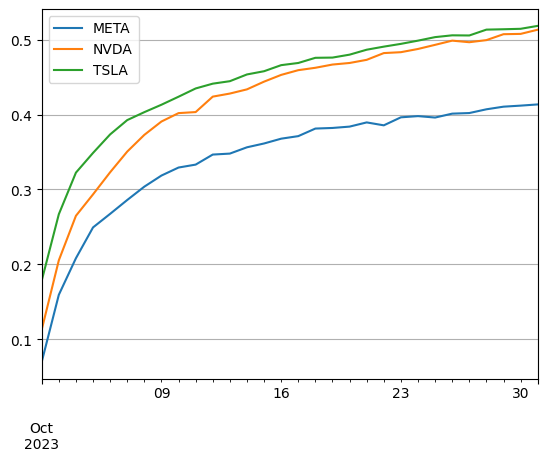

In [40]:
# Cuántos escenarios cumplen con la condición en relación a los simulados
P_META=B_META.mean(axis=1)
P_META.plot(grid=True,label='META',legend=True)

P_NVDA=B_NVDA.mean(axis=1)
P_NVDA.plot(grid=True,label='NVDA',legend=True)

P_TSLA=B_TSLA.mean(axis=1)
P_TSLA.plot(grid=True,label='TSLA',legend=True)

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (Montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

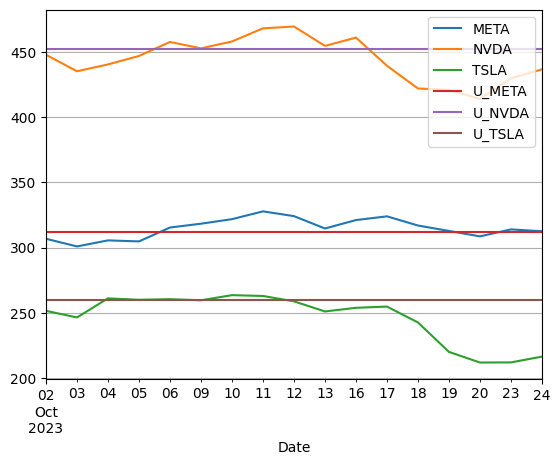

In [42]:
datos=yf.download(tickers,'2023-10-01','2023-10-25')['Adj Close']
datos['U_META']=U['META']
datos['U_NVDA']=U['NVDA']
datos['U_TSLA']=U['TSLA']
datos.plot(grid=True)